In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('data.csv',index_col='Cost Rank')
df.head()


,Product Name,Product Life Cycle,FY20 Q4,FY21 Q1,FY21 Q2,FY21 Q3,FY21 Q4,FY22 Q1,FY22 Q2,FY22 Q3,FY22 Q4,FY23 Q1,FY23 Q2,FY23 Q3,FY23Q4 Demand,FYQ23 Q4 Marketing,FY23 Q4 Stats/ML
Cost Rank,,,,,,,,,,,,,,,,,
1,ROUTER 1,Sustaining,NaN,NaN,NaN,906.0,941.0,663.0,769.0,3565.0,1020,1670,38,2141,"1,716","1,716","1,948"
2,TRANSCIEVER,Sustaining,87173.0,102849.0,126375.0,128629.0,179125.0,138750.0,208760.0,116126.0,150803,82163,82408,67132,"85,000","141,285","97,995"
3,SWITCH 1,Sustaining,NaN,NaN,NaN,3651.0,10409.0,10575.0,17934.0,15104.0,15525,6938,9595,9231,"12,000","11,820","11,184"
4,ACCESS POINT 1,Sustaining,NaN,NaN,NaN,NaN,NaN,NaN,9576.0,46029.0,109452,54955,60478,62708,"62,771","79,113","65,310"
5,ACCESS POINT 2,Sustaining,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26769,33670,74853,80944,"76,192","113,704","93,200"


In [53]:
df = df.drop(['FY23Q4 Demand','FYQ23 Q4 Marketing','FY23 Q4 Stats/ML'],axis=1)
df.head()

,Product Name,Product Life Cycle,FY20 Q4,FY21 Q1,FY21 Q2,FY21 Q3,FY21 Q4,FY22 Q1,FY22 Q2,FY22 Q3,FY22 Q4,FY23 Q1,FY23 Q2,FY23 Q3
Cost Rank,,,,,,,,,,,,,,
1,ROUTER 1,Sustaining,NaN,NaN,NaN,906.0,941.0,663.0,769.0,3565.0,1020,1670,38,2141
2,TRANSCIEVER,Sustaining,87173.0,102849.0,126375.0,128629.0,179125.0,138750.0,208760.0,116126.0,150803,82163,82408,67132
3,SWITCH 1,Sustaining,NaN,NaN,NaN,3651.0,10409.0,10575.0,17934.0,15104.0,15525,6938,9595,9231
4,ACCESS POINT 1,Sustaining,NaN,NaN,NaN,NaN,NaN,NaN,9576.0,46029.0,109452,54955,60478,62708
5,ACCESS POINT 2,Sustaining,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26769,33670,74853,80944


In [54]:
print(df.isna().sum())

Product Name          0
Product Life Cycle    0
FY20 Q4               9
FY21 Q1               9
FY21 Q2               9
FY21 Q3               6
FY21 Q4               6
FY22 Q1               6
FY22 Q2               3
FY22 Q3               3
FY22 Q4               0
FY23 Q1               0
FY23 Q2               0
FY23 Q3               0
dtype: int64


In [55]:
print(df['Product Name'].value_counts())

ROUTER 1               1
TRANSCIEVER            1
SWITCH 10              1
ACCESS POINT 4         1
SWITCH 9               1
SWITCH 8               1
WIRELESS CONTROLLER    1
SWITCH 7               1
SUPERVISOR ENGINE      1
ACCESS POINT 3         1
SWITCH 6               1
SWITCH 5               1
SWITCH 4               1
POWER SUPPLY 1         1
SWITCH 3               1
SWITCH 2               1
ACCESS POINT 2         1
ACCESS POINT 1         1
SWITCH 1               1
POWER SUPPLY 2         1
Name: Product Name, dtype: int64


In [56]:
prdName = df['Product Name']
prdName

Cost Rank
1                ROUTER 1
2             TRANSCIEVER
3                SWITCH 1
4          ACCESS POINT 1
5          ACCESS POINT 2
6                SWITCH 2
7                SWITCH 3
8          POWER SUPPLY 1
9                SWITCH 4
10               SWITCH 5
11               SWITCH 6
12         ACCESS POINT 3
13      SUPERVISOR ENGINE
14               SWITCH 7
15    WIRELESS CONTROLLER
16               SWITCH 8
17               SWITCH 9
18         ACCESS POINT 4
19              SWITCH 10
20         POWER SUPPLY 2
Name: Product Name, dtype: object

In [57]:
df = df.drop(columns=['Product Life Cycle','Product Name'],axis=1)
q1 = df.copy(deep=True)
df

,FY20 Q4,FY21 Q1,FY21 Q2,FY21 Q3,FY21 Q4,FY22 Q1,FY22 Q2,FY22 Q3,FY22 Q4,FY23 Q1,FY23 Q2,FY23 Q3
Cost Rank,,,,,,,,,,,,
1,NaN,NaN,NaN,906.0,941.0,663.0,769.0,3565.0,1020,1670,38,2141
2,87173.0,102849.0,126375.0,128629.0,179125.0,138750.0,208760.0,116126.0,150803,82163,82408,67132
3,NaN,NaN,NaN,3651.0,10409.0,10575.0,17934.0,15104.0,15525,6938,9595,9231
4,NaN,NaN,NaN,NaN,NaN,NaN,9576.0,46029.0,109452,54955,60478,62708
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26769,33670,74853,80944
6,13432.0,12463.0,13452.0,14581.0,15831.0,13864.0,15012.0,11349.0,10422,8726,10185,8645
7,28585.0,19686.0,44724.0,37781.0,31905.0,37888.0,32689.0,30442.0,27028,21246,21149,10584
8,115709.0,98337.0,147681.0,185327.0,194170.0,220386.0,204604.0,194538.0,185160,147284,136997,100623
9,NaN,NaN,NaN,177.0,270.0,850.0,2717.0,3833.0,4279,6089,8063,2535


In [58]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df)
df.loc[:,:] = imputed
df

C:\Users\prahl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\prahl\AppData\Local\Temp\ipykernel_20400\2710167848.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,:] = imputed


,FY20 Q4,FY21 Q1,FY21 Q2,FY21 Q3,FY21 Q4,FY22 Q1,FY22 Q2,FY22 Q3,FY22 Q4,FY23 Q1,FY23 Q2,FY23 Q3
Cost Rank,,,,,,,,,,,,
1,2307.073746,451.956724,-576.981064,906.000000,941.000000,663.000000,769.000000,3565.000000,1020.0,1670.0,38.0,2141.0
2,87173.000000,102849.000000,126375.000000,128629.000000,179125.000000,138750.000000,208760.000000,116126.000000,150803.0,82163.0,82408.0,67132.0
3,3824.325064,3461.835605,-776.034739,3651.000000,10409.000000,10575.000000,17934.000000,15104.000000,15525.0,6938.0,9595.0,9231.0
4,-4035.575509,-44021.250466,-62045.895841,-1640.390947,-11509.053544,48194.382201,9576.000000,46029.000000,109452.0,54955.0,60478.0,62708.0
5,63257.004944,94777.073448,87290.971665,82405.406778,32969.991527,44450.306703,34926.499517,-9199.103098,26769.0,33670.0,74853.0,80944.0
6,13432.000000,12463.000000,13452.000000,14581.000000,15831.000000,13864.000000,15012.000000,11349.000000,10422.0,8726.0,10185.0,8645.0
7,28585.000000,19686.000000,44724.000000,37781.000000,31905.000000,37888.000000,32689.000000,30442.000000,27028.0,21246.0,21149.0,10584.0
8,115709.000000,98337.000000,147681.000000,185327.000000,194170.000000,220386.000000,204604.000000,194538.000000,185160.0,147284.0,136997.0,100623.0
9,4942.847567,2502.008906,2979.466201,177.000000,270.000000,850.000000,2717.000000,3833.000000,4279.0,6089.0,8063.0,2535.0


In [59]:
new_df = df.copy()
new_df['Product Name'] = prdName
new_df.head()

,FY20 Q4,FY21 Q1,FY21 Q2,FY21 Q3,FY21 Q4,FY22 Q1,FY22 Q2,FY22 Q3,FY22 Q4,FY23 Q1,FY23 Q2,FY23 Q3,Product Name
Cost Rank,,,,,,,,,,,,,
1,2307.073746,451.956724,-576.981064,906.000000,941.000000,663.000000,769.000000,3565.000000,1020.0,1670.0,38.0,2141.0,ROUTER 1
2,87173.000000,102849.000000,126375.000000,128629.000000,179125.000000,138750.000000,208760.000000,116126.000000,150803.0,82163.0,82408.0,67132.0,TRANSCIEVER
3,3824.325064,3461.835605,-776.034739,3651.000000,10409.000000,10575.000000,17934.000000,15104.000000,15525.0,6938.0,9595.0,9231.0,SWITCH 1
4,-4035.575509,-44021.250466,-62045.895841,-1640.390947,-11509.053544,48194.382201,9576.000000,46029.000000,109452.0,54955.0,60478.0,62708.0,ACCESS POINT 1
5,63257.004944,94777.073448,87290.971665,82405.406778,32969.991527,44450.306703,34926.499517,-9199.103098,26769.0,33670.0,74853.0,80944.0,ACCESS POINT 2


In [60]:
new_df.index = new_df["Product Name"]
new_df = new_df.drop('Product Name',axis=1)
new_df

,FY20 Q4,FY21 Q1,FY21 Q2,FY21 Q3,FY21 Q4,FY22 Q1,FY22 Q2,FY22 Q3,FY22 Q4,FY23 Q1,FY23 Q2,FY23 Q3
Product Name,,,,,,,,,,,,
ROUTER 1,2307.073746,451.956724,-576.981064,906.000000,941.000000,663.000000,769.000000,3565.000000,1020.0,1670.0,38.0,2141.0
TRANSCIEVER,87173.000000,102849.000000,126375.000000,128629.000000,179125.000000,138750.000000,208760.000000,116126.000000,150803.0,82163.0,82408.0,67132.0
SWITCH 1,3824.325064,3461.835605,-776.034739,3651.000000,10409.000000,10575.000000,17934.000000,15104.000000,15525.0,6938.0,9595.0,9231.0
ACCESS POINT 1,-4035.575509,-44021.250466,-62045.895841,-1640.390947,-11509.053544,48194.382201,9576.000000,46029.000000,109452.0,54955.0,60478.0,62708.0
ACCESS POINT 2,63257.004944,94777.073448,87290.971665,82405.406778,32969.991527,44450.306703,34926.499517,-9199.103098,26769.0,33670.0,74853.0,80944.0
SWITCH 2,13432.000000,12463.000000,13452.000000,14581.000000,15831.000000,13864.000000,15012.000000,11349.000000,10422.0,8726.0,10185.0,8645.0
SWITCH 3,28585.000000,19686.000000,44724.000000,37781.000000,31905.000000,37888.000000,32689.000000,30442.000000,27028.0,21246.0,21149.0,10584.0
POWER SUPPLY 1,115709.000000,98337.000000,147681.000000,185327.000000,194170.000000,220386.000000,204604.000000,194538.000000,185160.0,147284.0,136997.0,100623.0
SWITCH 4,4942.847567,2502.008906,2979.466201,177.000000,270.000000,850.000000,2717.000000,3833.000000,4279.0,6089.0,8063.0,2535.0


In [61]:
new_df = new_df.transpose()
new_df

Product Name,ROUTER 1,TRANSCIEVER,SWITCH 1,ACCESS POINT 1,ACCESS POINT 2,SWITCH 2,SWITCH 3,POWER SUPPLY 1,SWITCH 4,SWITCH 5,SWITCH 6,ACCESS POINT 3,SUPERVISOR ENGINE,SWITCH 7,WIRELESS CONTROLLER,SWITCH 8,SWITCH 9,ACCESS POINT 4,SWITCH 10,POWER SUPPLY 2
FY20 Q4,2307.073746,87173.0,3824.325064,-4035.575509,63257.004944,13432.0,28585.0,115709.0,4942.847567,4571.0,23487.186368,65048.0,24054.962300,6073.0,1208.0,4.0,6187.0,38878.657868,31164.206621,28279.0
FY21 Q1,451.956724,102849.0,3461.835605,-44021.250466,94777.073448,12463.0,19686.0,98337.0,2502.008906,4100.0,15448.778663,67810.0,15114.888406,5459.0,963.0,-4.0,5301.0,59241.055979,44086.932197,22704.0
FY21 Q2,-576.981064,126375.0,-776.034739,-62045.895841,87290.971665,13452.0,44724.0,147681.0,2979.466201,4830.0,43287.567757,90928.0,48629.544593,6736.0,1698.0,36.0,7172.0,51525.626625,38498.938639,24098.0
FY21 Q3,906.000000,128629.0,3651.000000,-1640.390947,82405.406778,14581.0,37781.0,185327.0,177.000000,5472.0,33621.053406,148547.0,33661.071086,12213.0,1833.0,305.0,7582.0,58629.425853,54931.981673,31461.0
FY21 Q4,941.000000,179125.0,10409.000000,-11509.053544,32969.991527,15831.0,31905.0,194170.0,270.000000,7391.0,9448.744654,228945.0,8663.094087,13883.0,2423.0,1093.0,10964.0,47552.985370,63058.327989,47009.0
FY22 Q1,663.000000,138750.0,10575.000000,48194.382201,44450.306703,13864.0,37888.0,220386.0,850.000000,7894.0,19185.732376,204184.0,17686.899331,27045.0,2602.0,2360.0,11501.0,41875.615493,49799.319509,35145.0
FY22 Q2,769.000000,208760.0,17934.000000,9576.000000,34926.499517,15012.0,32689.0,204604.0,2717.000000,7101.0,222.000000,245453.0,15.000000,15162.0,2341.0,4317.0,14980.0,39757.913165,41181.481528,45978.0
FY22 Q3,3565.000000,116126.0,15104.000000,46029.000000,-9199.103098,11349.0,30442.0,194538.0,3833.000000,6943.0,1549.000000,245803.0,108.000000,13855.0,1830.0,4343.0,9158.0,20803.518088,46457.190883,34518.0
FY22 Q4,1020.000000,150803.0,15525.000000,109452.000000,26769.000000,10422.0,27028.0,185160.0,4279.000000,6126.0,4619.000000,136283.0,1972.000000,12351.0,1567.0,4094.0,11601.0,13260.000000,1227.000000,40605.0
FY23 Q1,1670.000000,82163.0,6938.000000,54955.000000,33670.000000,8726.0,21246.0,147284.0,6089.000000,4616.0,4764.000000,76020.0,2427.000000,8933.0,1210.0,2756.0,3788.0,21667.000000,24186.000000,26925.0


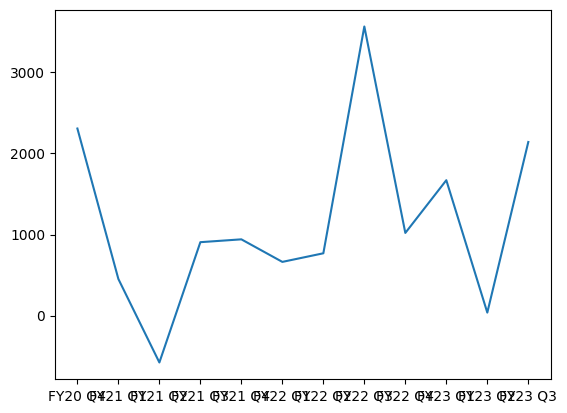

In [62]:
plt.plot(new_df['ROUTER 1'])

In [63]:
new_df.describe()

Product Name,ROUTER 1,TRANSCIEVER,SWITCH 1,ACCESS POINT 1,ACCESS POINT 2,SWITCH 2,SWITCH 3,POWER SUPPLY 1,SWITCH 4,SWITCH 5,SWITCH 6,ACCESS POINT 3,SUPERVISOR ENGINE,SWITCH 7,WIRELESS CONTROLLER,SWITCH 8,SWITCH 9,ACCESS POINT 4,SWITCH 10,POWER SUPPLY 2
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1157.920784,122524.416667,8789.343827,22345.017991,53926.179290,12330.166667,28642.250000,160901.333333,3269.776889,5676.750000,13942.005269,134503.166667,13105.788317,11188.500000,1720.416667,2103.166667,8263.916667,38682.899870,34920.281587,31513.000000
std,1113.205519,42361.772764,5639.833596,49607.680830,31436.224547,2433.350658,9427.529071,41988.548946,2354.809037,1345.455187,13602.307674,77876.137798,15532.933441,6152.834461,519.862649,1739.648127,3374.747518,14775.141133,19113.783522,9383.141284
min,-576.981064,67132.000000,-776.034739,-62045.895841,-9199.103098,8645.000000,10584.000000,98337.000000,177.000000,4100.000000,222.000000,51586.000000,15.000000,5459.000000,963.000000,-4.000000,3788.000000,13260.000000,1227.000000,17799.000000
25%,610.239181,85981.750000,3780.993798,-5903.945018,33494.997882,10362.750000,21221.750000,131675.000000,2089.006679,4604.750000,4727.750000,67119.500000,2065.000000,6500.500000,1285.750000,237.750000,5530.750000,28290.250000,22332.500000,23982.250000
50%,923.500000,121250.500000,9413.000000,27802.500000,53853.655824,12947.500000,29513.500000,166420.500000,2848.233100,5151.000000,8052.372327,113605.500000,5752.047044,10573.000000,1678.500000,2558.000000,7377.000000,40131.456582,39840.210084,29870.000000
75%,1787.750000,141763.250000,11707.250000,56335.750000,81309.351695,14043.250000,33962.000000,194262.000000,4444.961892,6982.500000,20261.095874,210374.250000,19278.915073,13862.000000,1960.000000,3368.000000,11098.250000,48546.145684,47292.723040,36510.000000
max,3565.000000,208760.000000,17934.000000,109452.000000,94777.073448,15831.000000,44724.000000,220386.000000,8063.000000,7894.000000,43287.567757,245803.000000,48629.544593,27045.000000,2602.000000,4343.000000,14980.000000,59241.055979,63058.327989,47009.000000


In [64]:
for col in new_df.transpose().columns:
    print(col)

FY20 Q4
FY21 Q1
FY21 Q2
FY21 Q3
FY21 Q4
FY22 Q1
FY22 Q2
FY22 Q3
FY22 Q4
FY23 Q1
FY23 Q2
FY23 Q3


In [88]:
q1

,FY20 Q4,FY21 Q1,FY21 Q2,FY21 Q3,FY21 Q4,FY22 Q1,FY22 Q2,FY22 Q3,FY22 Q4,FY23 Q1,FY23 Q2,FY23 Q3
0,NaN,NaN,NaN,906.0,941.0,663.0,769.0,3565.0,1020,1670,38,2141
1,87173.0,102849.0,126375.0,128629.0,179125.0,138750.0,208760.0,116126.0,150803,82163,82408,67132
2,NaN,NaN,NaN,3651.0,10409.0,10575.0,17934.0,15104.0,15525,6938,9595,9231
3,NaN,NaN,NaN,NaN,NaN,NaN,9576.0,46029.0,109452,54955,60478,62708
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26769,33670,74853,80944
5,13432.0,12463.0,13452.0,14581.0,15831.0,13864.0,15012.0,11349.0,10422,8726,10185,8645
6,28585.0,19686.0,44724.0,37781.0,31905.0,37888.0,32689.0,30442.0,27028,21246,21149,10584
7,115709.0,98337.0,147681.0,185327.0,194170.0,220386.0,204604.0,194538.0,185160,147284,136997,100623
8,NaN,NaN,NaN,177.0,270.0,850.0,2717.0,3833.0,4279,6089,8063,2535
9,4571.0,4100.0,4830.0,5472.0,7391.0,7894.0,7101.0,6943.0,6126,4616,4680,4397


In [89]:
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline

# Convert columns to numeric
q1 = q1.apply(pd.to_numeric, errors='coerce')

# Columns to interpolate
columns_to_interpolate = q1.columns

# Iterate through each row and perform spline interpolation for missing values
for index, row in q1.iterrows():
    x = row.dropna().index  # Non-missing indices
    y = row.dropna().values  # Non-missing values
    
    # Ensure that x and y contain numeric values only
    x_numeric = q1.columns.get_indexer_for(x)
    y_numeric = y[np.logical_not(np.isnan(y))]
    
    if len(y_numeric) > 2:  # Spline requires at least 3 non-missing values
        spline = UnivariateSpline(x_numeric, y_numeric, k=3, s=0)
        q1.loc[index] = spline(range(len(q1.columns)))
    else:
        # If there are not enough non-missing values, fill missing values with mean
        q1.loc[index] = row.fillna(row.mean())

# Print the imputed DataFrame
print(q1)



         FY20 Q4       FY21 Q1       FY21 Q2       FY21 Q3       FY21 Q4  \
0   7.737667e+03  3.422867e+03  1.439467e+03  9.060000e+02  9.410000e+02   
1   8.717300e+04  1.028490e+05  1.263750e+05  1.286290e+05  1.791250e+05   
2  -3.067171e+05 -1.298578e+05 -3.475321e+04  3.651000e+03  1.040900e+04   
3   1.419267e+07  8.879015e+06  5.074695e+06  2.532652e+06  1.005826e+06   
4   9.530593e+06  6.765774e+06  4.590229e+06  2.934584e+06  1.729465e+06   
5   1.343200e+04  1.246300e+04  1.345200e+04  1.458100e+04  1.583100e+04   
6   2.858500e+04  1.968600e+04  4.472400e+04  3.778100e+04  3.190500e+04   
7   1.157090e+05  9.833700e+04  1.476810e+05  1.853270e+05  1.941700e+05   
8  -1.384719e+04 -5.214877e+03 -1.095719e+03  1.770000e+02  2.700000e+02   
9   4.571000e+03  4.100000e+03  4.830000e+03  5.472000e+03  7.391000e+03   
10  4.117649e+05  2.590457e+05  1.490947e+05  7.507433e+04  3.014713e+04   
11  6.504800e+04  6.781000e+04  9.092800e+04  1.485470e+05  2.289450e+05   
12  2.919259